***
# A equação de Schrödinger para o átomo de hidrogênio
***

O objetivo desse pequeno código é plotar as curvas de probabilidade de se encontrar um elétron em um determinado orbital a partir de uma determinada distância em relação ao núcleo. O arcabouço teórico não será aqui demonstrado. O leitor é convidado a se aprofundar mais no tema nos livros de Química Geral e Inorgância (Kotz, Atkins, etc) e também no [Libretexts](https://bit.ly/3hOOTpS) de Química.


### Teoria: como descrever a posição de um elétron na eletrosfera?

A trajetória de um elétron em torno do núcleo atômico (para o átomo de hidrogênio) é descrita matematicamente pela equação de Schrödinger. Um dos subterfúgios utilizados para resolver essa equação é o procedimento de **separação de variáveis** através de uma **função de onda $\psi(r,\theta,\phi)$**.

As funções de onda são então as responsáveis por descrever matematicamente a posição do elétron na eletrosfera. Elas são também conhecidas como os <font color = 'red'> **orbitais atômicos** </font>. Quando um elétron é descrito por determinada função de onda, dizemos que ele está em um determinado orbital.

Você deve se lembrar lá do ensino médio que, para descrevermos quanticamente um orbital, precisamos dos chamados **números quânticos**, correto? São eles: $n, l$ e $m_l$. A abordagem de Schrödinger inclui esses números, de maneira que, para cada combinação desses números, uma função de onda diferente é determinada.

Por exemplo, para o orbital *1s*, a função de onda é dada por:

$\psi_{100} = \frac{1}{\sqrt{\pi}}\left(\frac{Z}{a_0}\right)^{\frac{3}{2}}e^{-\rho}$

onde $\rho = \frac{Z}{a_0}r$, sendo $a_0$ o raio atômico de Bohr (52,9 pm) e Z o número atômico do átomo em questão.

A seguir, vamos implementar um código para plotar essas funções.

### Primeiro passo: chamando os pacotes

Para esse código, usaremos apenas os seguintes pacotes:

* **numpy**;
* **matplotlib.pyplot**
* **math**

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

### Segundo passo: criando variáveis e funções

Primeiro, vamos criar um vetor para o **raio (r)**, com diversos pontos, e o raio atômico de Bohr ($a_0$):

In [39]:
r = np.arange(0.0, 1000.0, 0.5)
a0 = 52.9 #pm, raio atômico de Bohr

Agora é hora de definirmos as funções de onda para os orbitais *1s*, *2s*, *2p* e *3s*. Faremos isso definindo uma função `psi`, que receberá os argumentos Z, r e theta:

In [37]:
theta = np.linspace(0, np.pi, len(r)) #Um vetor para os ângulos tetha, de 0 a pi, do tamanho do vetor r.

def psi(Z, r, theta):
    rho = (Z * r)/a0
    psi100 = 1.0 / np.sqrt(pi) * (Z / a0)**1.5 * np.exp(-rho) #Função de onda - 1s
    psi200 = 1.0 / np.sqrt(32.0 * pi) * (Z / a0)**1.5 * (2.0 - rho)*np.exp(-rho / 2.0) #Função de onda - 2s
    psi210 = 1.0 / np.sqrt(32.0 * pi) * (Z / a0)**1.5 * rho * np.exp(-rho / 2.0)*np.cos(theta) #Função de onda - 2p (m=0)
    psi300 = 1.0 / (81.0 * np.sqrt(3.0 * pi)) * (Z / a0)**1.5 * (27.0 - 18.0*rho + 2.0*rho**2) * np.exp(-rho / 3.0) #Função de onda - 3s
    return psi100, psi200, psi210, psi300


O que obtemos com essa função quando fornecemos os argumentos Z, r e $\theta$ é justamente uma matriz com os resultados de todas as funções de onda dos orbitais 1s, 2s, 2p e 3s.

### Terceiro passo: gráficos

Podemos começar a plotar as soluções agora. Primeiro, vamos plotar as **densidades de probabilidades ($\psi^2 r^2$**) para o átomo de hidrogênio (Z = 1). Para o caso do orbital *2p*, consideremos $\theta = \pi$:

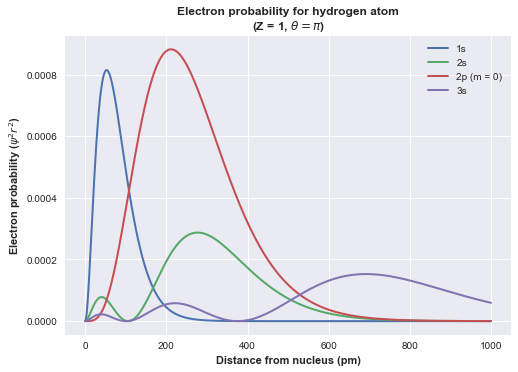

In [30]:
plt.plot(r, psi(1, r, np.pi)[0] ** 2 * r**2, lw = 2.0, label = '1s')
plt.plot(r, psi(1, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = '2s')
plt.plot(r, psi(1, r, np.pi)[2] ** 2 * r**2, lw = 2.0, label = '2p (m = 0)')
plt.plot(r, psi(1, r, np.pi)[3] ** 2 * r**2, lw = 2.0, label = '3s')
plt.xlabel('Distance from nucleus (pm)', fontweight = 'bold')
plt.ylabel(r'Electron probability ($\psi^2 r^2$)', fontweight = 'bold')
plt.legend(loc = 'best', frameon = False)
plt.title('Electron probability for hydrogen atom' "\n" r'(Z = 1, $\theta = \pi$)', fontweight = 'bold')
plt.show()

E se quisermos saber como fica a distribuição de probabilidade de encontrar um elétron no orbital 2s para diferentes átomos?

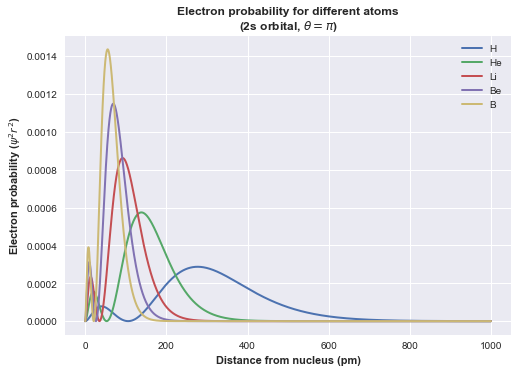

In [36]:
plt.plot(r, psi(1, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = 'H')
plt.plot(r, psi(2, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = 'He')
plt.plot(r, psi(3, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = 'Li')
plt.plot(r, psi(4, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = 'Be')
plt.plot(r, psi(5, r, np.pi)[1] ** 2 * r**2, lw = 2.0, label = 'B')
plt.legend(loc = 'best')
plt.xlabel('Distance from nucleus (pm)', fontweight = 'bold')
plt.ylabel(r'Electron probability ($\psi^2 r^2$)', fontweight = 'bold')
plt.title('Electron probability for different atoms' "\n" r'(2s orbital, $\theta = \pi$)', fontweight = 'bold')
plt.show()

O que o resultado anterior nos diz é algo que já deveríamos esperar: a medida que aumentamos o número atômico, fica mais fácil (mais provável) encontrar um elétron no orbital 2s. Para o átomo de hidrogênio, é mais provável que o único elétron que ele possui esteja mais longe do núcleo, uma vez que temos apenas um próton atraindo esse elétron. Quando aumentamos o número atômico, aumentamos o número de prótons no núcleo e, consequentemente, a força de atração, trazendo os elétrons mais pra perto do núcleo atômico.